In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from yellowbrick.model_selection import LearningCurve


In [95]:
drive.mount('drive')
dataset_address = 'drive/MyDrive/ML_HomeWorks/project/laptops.csv'



Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [96]:
df = pd.read_csv(dataset_address,index_col=0)
df

,cpu,screen_size,ram,graphic_ram,hdd,ssd,prices,is_unified,company
0,Celeron,15.6,4,0.0,1000,0,8300000,1,lenovo
1,Core i7,15.6,16,8.0,0,512,56599000,0,asus
2,M1,13.0,8,0.0,0,256,37000000,1,apple
3,Core i5,15.6,16,4.0,0,512,34469000,0,lenovo
4,Core i3,15.6,12,0.0,1000,256,15600000,1,lenovo
...,...,...,...,...,...,...,...,...,...
1165,Core i5,15.6,16,4.0,0,512,42492000,0,hp
1166,Core i3,15.6,4,2.0,1000,0,13000000,0,lenovo
1167,Core i5,14.0,16,8.0,0,256,13800000,0,dell
1172,Ryzen 5,15.6,16,4.0,0,1000,38500000,0,lenovo


In [97]:
one_hot_cpu = pd.get_dummies(df["cpu"], drop_first= True)
one_hot_company = pd.get_dummies(df["company"], drop_first= True)
df_std = df.copy()
df_std = df_std.join(one_hot_cpu).join(one_hot_company)
df_std.drop(["company","cpu"],axis=1,inplace=True)
df_std["prices"] = (df_std["prices"]-df_std["prices"].mean())/df_std["prices"].std()
df_std["hdd"] = (df_std["hdd"]-df_std["hdd"].mean())/df_std["hdd"].std()
df_std["ssd"] = (df_std["ssd"]-df_std["ssd"].mean())/df_std["ssd"].std()
df_std["screen_size"] = (df_std["screen_size"]-df_std["screen_size"].min()) / (df_std["screen_size"].max()-df_std["screen_size"].min())
df_std["ram"] = (df_std["ram"]-df_std["ram"].min()) / (df_std["ram"].max()-df_std["ram"].min())
df_std["graphic_ram"] = (df_std["graphic_ram"]-df_std["graphic_ram"].min()) / (df_std["graphic_ram"].max()-df_std["graphic_ram"].min())

df_std

,screen_size,ram,graphic_ram,hdd,ssd,prices,is_unified,Athlon,Celeron,Core i3,...,Ryzen 9,Xeon,apple,asus,dell,hp,lenovo,microsoft,msi,other
0,0.105495,0.007874,0.000000,2.168891,-1.357530,-0.929855,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.105495,0.055118,0.015625,-0.487123,-0.294892,0.152868,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.076923,0.023622,0.000000,-0.487123,-0.826211,-0.286484,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.105495,0.055118,0.007812,-0.487123,-0.294892,-0.343222,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.105495,0.039370,0.000000,2.168891,-0.826211,-0.766210,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,0.105495,0.055118,0.007812,-0.487123,-0.294892,-0.163370,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1166,0.105495,0.007874,0.003906,2.168891,-1.357530,-0.824495,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1167,0.087912,0.055118,0.015625,-0.487123,-0.826211,-0.806561,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1172,0.105495,0.055118,0.007812,-0.487123,0.717935,-0.252859,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
train, test = train_test_split(df_std, test_size=0.15)
train

,screen_size,ram,graphic_ram,hdd,ssd,prices,is_unified,Athlon,Celeron,Core i3,...,Ryzen 9,Xeon,apple,asus,dell,hp,lenovo,microsoft,msi,other
826,0.105495,0.055118,0.003906,2.168891,0.717935,-0.208249,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1122,0.105495,0.055118,0.007812,-0.487123,-0.294892,-0.060072,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
610,0.105495,0.039370,0.000000,2.168891,-0.294892,-0.748501,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1022,0.105495,0.118110,0.011719,-0.487123,0.717935,0.269056,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
509,0.105495,0.023622,0.003906,-0.487123,-0.826211,-0.590460,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0.105495,0.055118,0.015625,-0.487123,0.717935,0.666242,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
181,0.087912,0.055118,0.000000,-0.487123,0.717935,0.000455,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
973,0.105495,0.055118,0.015625,0.872756,-0.294892,0.004938,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
598,0.105495,0.055118,0.015625,-0.487123,0.717935,-0.399041,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
train_y = train["prices"]
train_x = train.drop("prices",axis=1)
test_y = test["prices"]
test_x = test.drop("prices",axis=1)

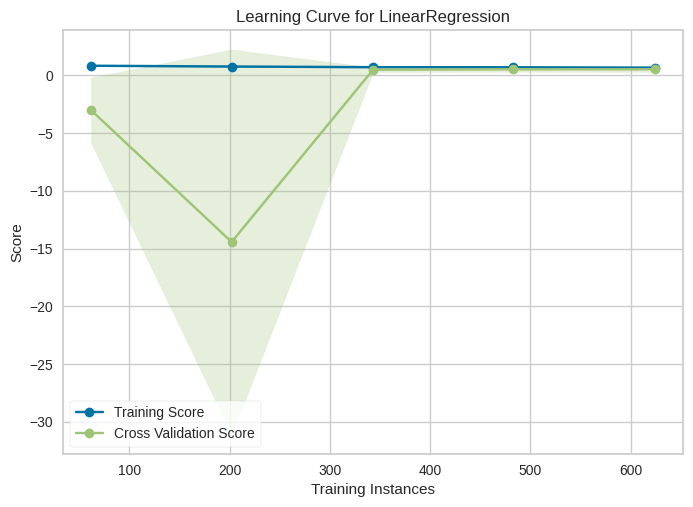

R^2 :  0.6011745878890333
MAE : 0.31474707276956587
RMSE: 0.5214106534276751


In [106]:
reg = linear_model.LinearRegression()
reg = reg.fit(train_x, train_y)
pred_y = reg.predict(test_x)
visualizer = LearningCurve(reg, scoring='r2')
visualizer.fit(train_x, train_y)
visualizer.show()
print("R^2 : ", r2_score(test_y, pred_y))
print("MAE :", mean_absolute_error(test_y, pred_y))
print("RMSE:",np.sqrt(mean_squared_error(test_y, pred_y)))

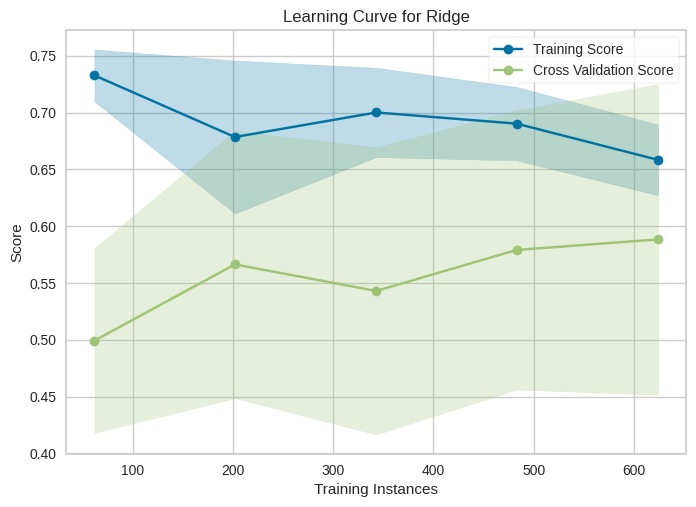

R^2 :  0.5914640653348726
MAE : 0.31638904105109117
RMSE: 0.5277200811475113


In [107]:
reg = linear_model.Ridge(alpha=.5)
reg = reg.fit(train_x, train_y)
pred_y = reg.predict(test_x)
visualizer = LearningCurve(reg, scoring='r2')
visualizer.fit(train_x, train_y)
visualizer.show()
print("R^2 : ", r2_score(test_y, pred_y))
print("MAE :", mean_absolute_error(test_y, pred_y))
print("RMSE:",np.sqrt(mean_squared_error(test_y, pred_y)))